# **Data cleaning, EDA**

## **🧹 Data Cleaning**

### **Import all the needed libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### **Load the data**

Load the data by the following link:\
https://docs.google.com/spreadsheets/d/1F0Bpis2Dkc_liAePBOOw-sqZaO1RGhM9o4olTKsYjxs

In [2]:
df = pd.read_excel("https://docs.google.com/spreadsheets/d/1F0Bpis2Dkc_liAePBOOw-sqZaO1RGhM9o4olTKsYjxs" +'/export?format=xlsx')

### **1st Look**

Let's take a look at the loaded data.

Output 5 random rows:

In [3]:
# YOUR CODE
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55:00,15:05:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30:00,17:40:00,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20:00,09:30:00,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50:00,20:05:00,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


Then it's reasonable to take a look at columns, dtypes and non-null values. Let's output this.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          43730 non-null  float64       
 3   Delivery_person_Ratings      43676 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Time_Orderd                  43853 non-null  object        
 10  Time_Order_picked            45584 non-null  object        
 11  Weather_conditions           44968 non-nu

### **Types fixing**

Remove Invalid Column for Analysis

In [5]:
del df['ID']

In [6]:
df['Delivery_person_ID'] = df['Delivery_person_ID'].astype('string')

In [7]:
list_col_name = ['Delivery_person_ID','Weather_conditions','Vehicle_condition','Road_traffic_density','Type_of_vehicle','Type_of_order','Festival','City']
df[list_col_name] = df[list_col_name].astype('string')

In [8]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce',format="%H:%M:%S")
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce',format="%H:%M:%S")

Seems to be okay now. Let's finally output a sample and move forward.

### **Handling Missing Values**

Let's check which of the columns contain missing values using the method `.info()`

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           45584 non-null  string        
 1   Delivery_person_Age          43730 non-null  float64       
 2   Delivery_person_Ratings      43676 non-null  float64       
 3   Restaurant_latitude          45584 non-null  float64       
 4   Restaurant_longitude         45584 non-null  float64       
 5   Delivery_location_latitude   45584 non-null  float64       
 6   Delivery_location_longitude  45584 non-null  float64       
 7   Order_Date                   45584 non-null  datetime64[ns]
 8   Time_Orderd                  39785 non-null  datetime64[ns]
 9   Time_Order_picked            40577 non-null  datetime64[ns]
 10  Weather_conditions           44968 non-null  string        
 11  Road_traffic_density         44983 non-nu

In [10]:
def replace_MedianValue_For_MisingValue_With_NumberCol(col_name):
  for i in col_name:
    # Lấy giá trị Mean của 'col_name'
    MissingValue = df[i].median()
    # Replace giá trị Null bằng giá trị Mean
    df[i] = df[i].fillna(MissingValue)

In [11]:
def replace_ModeValue_For_MisingValue_With_StringCol(col_name):
  for i in col_name:
    # Lấy giá trị Mode của 'col_name'
    MissingValue = df[i].mode()[0]
    # Replace giá trị Null bằng giá trị Mean
    df[i] = df[i].fillna(MissingValue)

In [12]:
# Với các cột Number thì replace Null Value bằng giá trị Median
list_number_col_name = ['Delivery_person_Ratings','Delivery_person_Age','multiple_deliveries']
replace_MedianValue_For_MisingValue_With_NumberCol(list_number_col_name)

# Với các cột String thì replace Null Value bằng giá trị Mode
list_str_col_name = ['Weather_conditions','Road_traffic_density','City','Festival']
replace_ModeValue_For_MisingValue_With_StringCol(list_str_col_name)

In [13]:
# drop all null/na values
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35407 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           35407 non-null  string        
 1   Delivery_person_Age          35407 non-null  float64       
 2   Delivery_person_Ratings      35407 non-null  float64       
 3   Restaurant_latitude          35407 non-null  float64       
 4   Restaurant_longitude         35407 non-null  float64       
 5   Delivery_location_latitude   35407 non-null  float64       
 6   Delivery_location_longitude  35407 non-null  float64       
 7   Order_Date                   35407 non-null  datetime64[ns]
 8   Time_Orderd                  35407 non-null  datetime64[ns]
 9   Time_Order_picked            35407 non-null  datetime64[ns]
 10  Weather_conditions           35407 non-null  string        
 11  Road_traffic_density         35407 non-null  s

Seems to be okay now. Let's finally output a sample and move forward.

### **Fixing Inconsistencies in Strings**

There is the column `Class`, that should contain the limited number of unique values (categorical ones).

But if it has different letter case or other inconsistencies, it will influence on an analysis results.

Let's check the unique values and Then convert it from String to Category to make it faster and less memory consuming.

In [15]:
def check_unique_and_convert_Category(col_name):
  for i in col_name:
    df[i].to_string().lower()
    df[i].unique()
    df[i] = df[i].astype('category')

In [16]:
list_col = ['Weather_conditions','Vehicle_condition','Road_traffic_density','Type_of_vehicle','Type_of_order','Festival','City']
check_unique_and_convert_Category(list_col)

### **Handling outliers (IQR)**
Detect outliers using method based on IQR and remove them.

In [17]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,multiple_deliveries,Time_taken (min)
count,35407.000000,35407.000000,35407.000000,35407.000000,35407.000000,35407.000000,35407,35407,35407,35407.000000,35407.000000
mean,29.584094,4.635533,17.236557,70.793171,17.458145,70.856686,2022-03-13 16:44:49.908775168,1900-01-01 18:01:33.939051264,1900-01-01 18:11:30.634620416,0.750445,26.344452
min,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,2022-02-11 00:00:00,1900-01-01 08:10:00,1900-01-01 08:15:00,0.000000,10.000000
25%,25.000000,4.500000,12.933298,73.170937,12.985662,73.288921,2022-03-04 00:00:00,1900-01-01 15:45:00,1900-01-01 15:55:00,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.898497,18.630016,76.004377,2022-03-15 00:00:00,1900-01-01 19:15:00,1900-01-01 19:25:00,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.045359,22.783839,78.104095,2022-03-27 00:00:00,1900-01-01 21:30:00,1900-01-01 21:40:00,1.000000,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.045562,88.563452,2022-04-06 00:00:00,1900-01-01 23:50:00,1900-01-01 23:55:00,3.000000,54.000000
std,5.752982,0.312557,7.696108,21.079794,7.333240,21.080117,NaN,NaN,NaN,0.568748,9.394847


In [18]:
def handle_Outlier(df, list_col_name_outlier):
  for i in list_col_name_outlier:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df[i] >= lower_bound) &(df[i] <= upper_bound)]

In [19]:
list_col_name_outlier =  list(df.select_dtypes("number").columns)

In [20]:
handle_Outlier(df,list_col_name_outlier)

In [21]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,multiple_deliveries,Time_taken (min)
count,35407.000000,35407.000000,35407.000000,35407.000000,35407.000000,35407.000000,35407,35407,35407,35407.000000,35407.000000
mean,29.584094,4.635533,17.236557,70.793171,17.458145,70.856686,2022-03-13 16:44:49.908775168,1900-01-01 18:01:33.939051264,1900-01-01 18:11:30.634620416,0.750445,26.344452
min,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,2022-02-11 00:00:00,1900-01-01 08:10:00,1900-01-01 08:15:00,0.000000,10.000000
25%,25.000000,4.500000,12.933298,73.170937,12.985662,73.288921,2022-03-04 00:00:00,1900-01-01 15:45:00,1900-01-01 15:55:00,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.898497,18.630016,76.004377,2022-03-15 00:00:00,1900-01-01 19:15:00,1900-01-01 19:25:00,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.045359,22.783839,78.104095,2022-03-27 00:00:00,1900-01-01 21:30:00,1900-01-01 21:40:00,1.000000,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.045562,88.563452,2022-04-06 00:00:00,1900-01-01 23:50:00,1900-01-01 23:55:00,3.000000,54.000000
std,5.752982,0.312557,7.696108,21.079794,7.333240,21.080117,NaN,NaN,NaN,0.568748,9.394847


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35407 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           35407 non-null  string        
 1   Delivery_person_Age          35407 non-null  float64       
 2   Delivery_person_Ratings      35407 non-null  float64       
 3   Restaurant_latitude          35407 non-null  float64       
 4   Restaurant_longitude         35407 non-null  float64       
 5   Delivery_location_latitude   35407 non-null  float64       
 6   Delivery_location_longitude  35407 non-null  float64       
 7   Order_Date                   35407 non-null  datetime64[ns]
 8   Time_Orderd                  35407 non-null  datetime64[ns]
 9   Time_Order_picked            35407 non-null  datetime64[ns]
 10  Weather_conditions           35407 non-null  category      
 11  Road_traffic_density         35407 non-null  c

## **🛠️ EXPORT DATA TO DATABASE**

In [23]:
df.to_csv('Delivery.csv', index=False)

## **🔗  EDA**

### **🧮 Calculations**


#### Measures of central tendency

Make the same dataframe containing the measures of central tendency for Time_Taken as we did for whole dataset. Then output it.

In [ ]:
def compare_tip_dynamic_dimension(input_dimension):
  ## agg by dimension
  df_agg_detail = df.groupby(input_dimension).agg(Time_taken_min = ('Time_taken (min)','min'),
                                    Time_taken_max= ('Time_taken (min)','max'),
                                    Time_taken_mean = ('Time_taken (min)','mean'),
                                    Time_taken_median = ('Time_taken (min)','median'),
                                    Time_taken_mode=('Time_taken (min)', lambda x: x.mode().iloc[0] if not x.mode().empty else None)
                                    )
  df_agg_detail = df_agg_detail.T
  df_agg_detail = df_agg_detail.reset_index()

  ## agg all df
  df_agg = df.agg(Time_taken_min = ('Time_taken (min)','min'),
                                    Time_taken_max= ('Time_taken (min)','max'),
                                    Time_taken_mean = ('Time_taken (min)','mean'),
                                    Time_taken_median = ('Time_taken (min)','median'),
                                    Time_taken_mode=('Time_taken (min)', lambda x: x.mode().iloc[0] if not x.mode().empty else None)
                                    )
  df_agg.columns = ["all"]
  df_agg = df_agg.reset_index()

  df_compare = df_agg.merge(df_agg_detail,"inner", on = "index")
  return df_compare

In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Delivery_person_Age")


,index,all,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
0,Time_taken_min,10.000000,10.000000,10.000000,10.0000,10.00000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
1,Time_taken_max,54.000000,54.000000,54.000000,54.0000,54.00000,54.000000,54.000000,53.000000,54.000000,...,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000
2,Time_taken_mean,26.344452,23.031884,22.898078,23.0067,23.04994,23.061652,22.798724,22.828701,23.068129,...,29.057956,30.0,29.945931,29.397831,29.648086,29.743956,29.440687,29.297312,29.589433,29.77707
3,Time_taken_median,26.000000,22.000000,22.000000,22.0000,22.00000,22.000000,22.000000,22.000000,22.000000,...,28.000000,29.0,29.000000,28.000000,29.000000,29.000000,29.000000,28.000000,29.000000,29.00000
4,Time_taken_mode,26.000000,16.000000,19.000000,15.0000,15.00000,15.000000,16.000000,18.000000,18.000000,...,25.000000,25.0,28.000000,25.000000,25.000000,26.000000,25.000000,27.000000,26.000000,26.00000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Delivery_person_Ratings")

,index,all,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
0,Time_taken_min,10.000000,31.000000,32.000000,31.000,31.000000,31.0,31.0,31.000000,31.000,...,15.000000,15.000000,15.000000,15.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
1,Time_taken_max,54.000000,44.000000,44.000000,41.000,43.000000,44.0,34.0,44.000000,44.000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000
2,Time_taken_mean,26.344452,36.666667,38.722222,35.625,37.133333,38.6,32.8,35.761905,36.375,...,34.739168,34.569298,34.634783,34.792857,23.551104,24.635606,24.27698,24.038075,24.197611,25.576816
3,Time_taken_median,26.000000,35.500000,39.000000,35.500,37.000000,39.0,33.0,35.000000,36.000,...,34.000000,34.000000,34.000000,35.000000,23.000000,24.000000,24.00000,23.000000,23.000000,25.000000
4,Time_taken_mode,26.000000,31.000000,34.000000,31.000,31.000000,40.0,34.0,31.000000,33.000,...,33.000000,33.000000,33.000000,33.000000,25.000000,26.000000,25.00000,26.000000,26.000000,25.000000


In [ ]:
# Tạo cột Time_Hour (làm tròn xuống giờ)
df['Time_Hour'] = df['Time_Orderd'].dt.floor('H')

# Tạo thêm cột Time_Hour_str để chỉ lấy giờ (HH)
df['Time_Hour_str'] = df['Time_Hour'].dt.strftime('%H:00 - %H:59')

## agg by dimension
df_agg_detail = df.groupby('Time_Hour_str').agg(Time_taken_min = ('Time_taken (min)','min'),
                                    Time_taken_max= ('Time_taken (min)','max'),
                                    Time_taken_mean = ('Time_taken (min)','mean'),
                                    Time_taken_median = ('Time_taken (min)','median'),
                                    Time_taken_mode=('Time_taken (min)', lambda x: x.mode().iloc[0] if not x.mode().empty else None)
                                    )
df_agg_detail = df_agg_detail.T
df_agg_detail = df_agg_detail.reset_index()

  ## agg all df
df_agg = df.agg(Time_taken_min = ('Time_taken (min)','min'),
                                    Time_taken_max= ('Time_taken (min)','max'),
                                    Time_taken_mean = ('Time_taken (min)','mean'),
                                    Time_taken_median = ('Time_taken (min)','median'),
                                    Time_taken_mode=('Time_taken (min)', lambda x: x.mode().iloc[0] if not x.mode().empty else None)
                                    )
df_agg.columns = ["all"]
df_agg = df_agg.reset_index()

df_compare = df_agg.merge(df_agg_detail,"inner", on = "index")
df_compare

<ipython-input-26-0f68bb63407d>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Time_Hour'] = df['Time_Orderd'].dt.floor('H')


,index,all,08:00 - 08:59,09:00 - 09:59,10:00 - 10:59,11:00 - 11:59,12:00 - 12:59,13:00 - 13:59,14:00 - 14:59,15:00 - 15:59,16:00 - 16:59,17:00 - 17:59,18:00 - 18:59,19:00 - 19:59,20:00 - 20:59,21:00 - 21:59,22:00 - 22:59,23:00 - 23:59
0,Time_taken_min,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
1,Time_taken_max,54.000000,34.000000,34.000000,34.000000,53.000000,53.000000,54.000000,54.000000,39.000000,39.00000,49.00000,49.000000,54.000000,54.000000,54.000000,44.000000,44.000000
2,Time_taken_mean,26.344452,19.604436,19.538219,19.487462,27.146725,26.580542,27.581994,27.672581,22.878223,23.01855,27.50539,27.272432,31.180845,31.118571,31.114737,22.375629,22.450276
3,Time_taken_median,26.000000,19.000000,19.000000,19.000000,27.000000,27.000000,27.000000,27.000000,23.000000,24.00000,27.00000,27.000000,31.000000,31.000000,31.000000,22.000000,22.000000
4,Time_taken_mode,26.000000,15.000000,15.000000,19.000000,28.000000,28.000000,26.000000,28.000000,26.000000,26.00000,26.00000,25.000000,27.000000,25.000000,26.000000,19.000000,20.000000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("multiple_deliveries")

,index,all,0.0,1.0,2.0,3.0
0,Time_taken_min,10.000000,10.000000,10.000000,31.000000,42.000000
1,Time_taken_max,54.000000,54.000000,54.000000,54.000000,54.000000
2,Time_taken_mean,26.344452,22.907997,26.770862,40.366645,47.867857
3,Time_taken_median,26.000000,22.000000,26.000000,40.000000,48.000000
4,Time_taken_mode,26.000000,15.000000,26.000000,39.000000,49.000000


#### **Histograms**

There are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### With the Vehicles

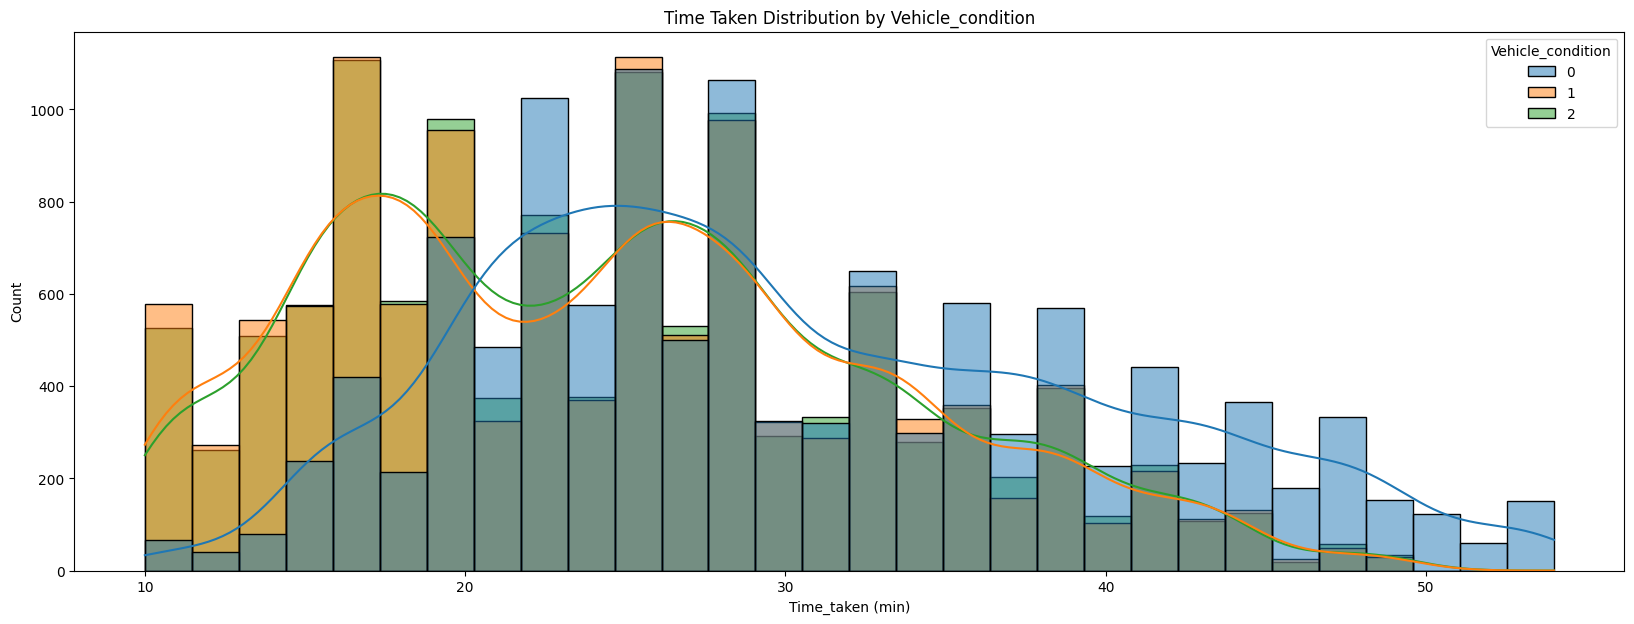

In [ ]:
# Histogram của time_taken theo Vehicle_condition
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='Time_taken (min)', hue='Vehicle_condition', bins=30, kde=True)
plt.title('Time Taken Distribution by Vehicle_condition')
plt.show()

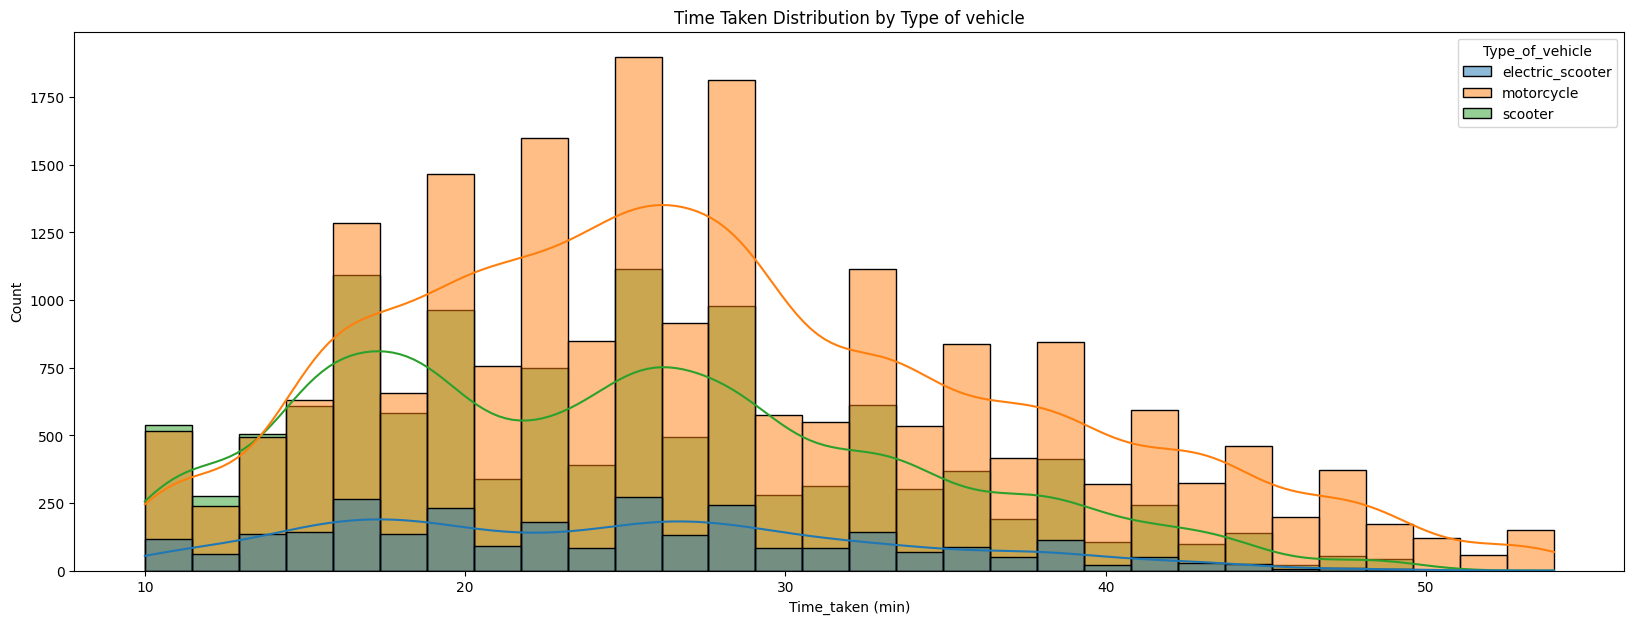

In [ ]:
# Histogram của time_taken theo Type_of_vehicle
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='Time_taken (min)', hue='Type_of_vehicle', bins=30, kde=True)
plt.title('Time Taken Distribution by Type of vehicle')
plt.show()

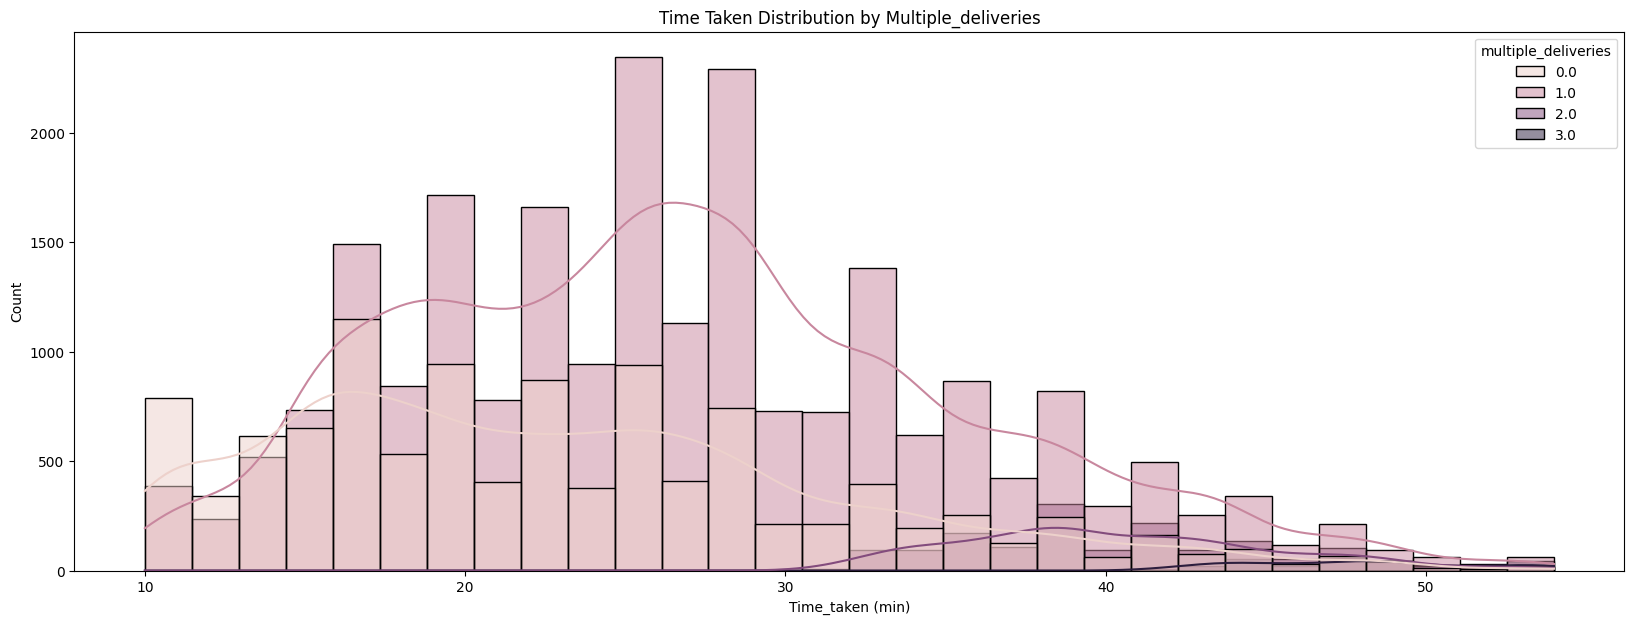

In [ ]:
# Histogram của time_taken theo Multiple_deliveries
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='Time_taken (min)', hue='multiple_deliveries', bins=30, kde=True)
plt.title('Time Taken Distribution by Multiple_deliveries')
plt.show()

##### With the Weather and traffic conditions

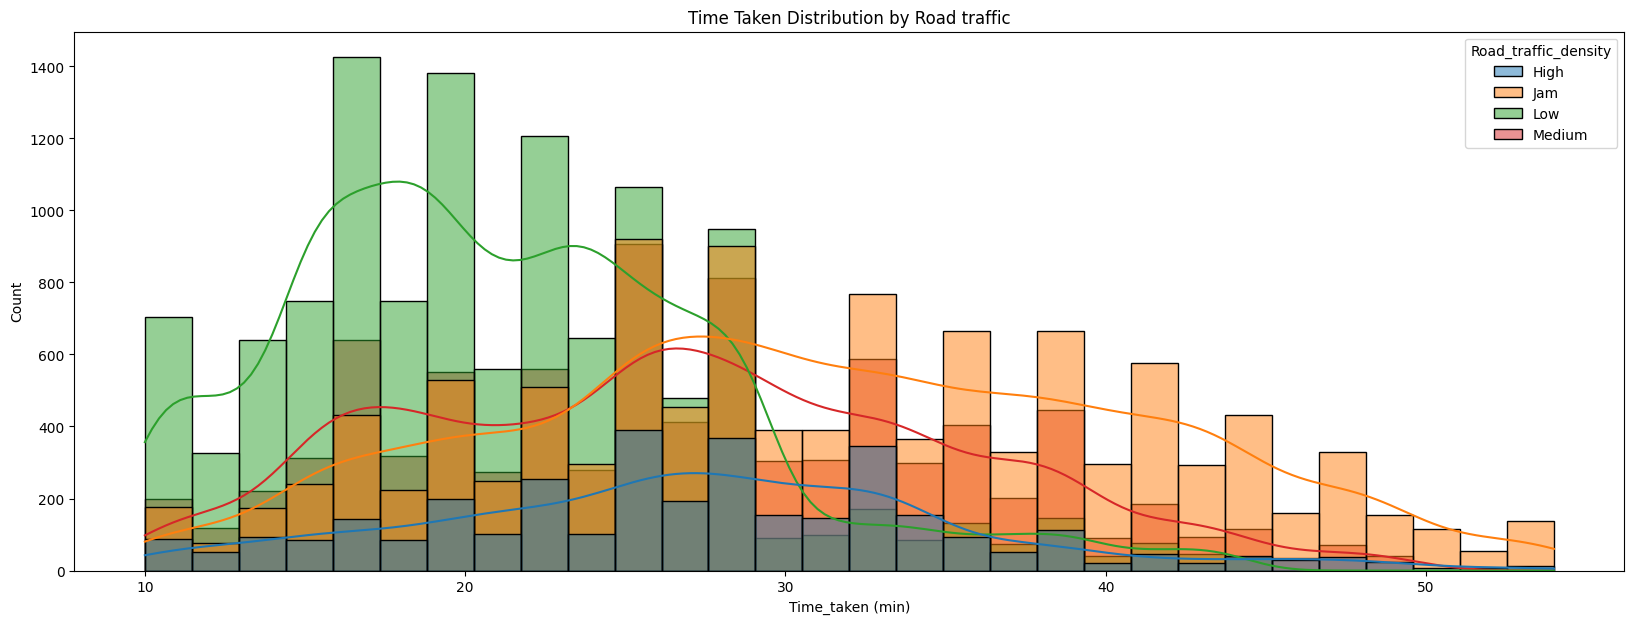

In [ ]:
# Histogram của time_taken theo traffic density
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='Time_taken (min)', hue='Road_traffic_density', bins=30, kde=True)
plt.title('Time Taken Distribution by Road traffic')
plt.show()


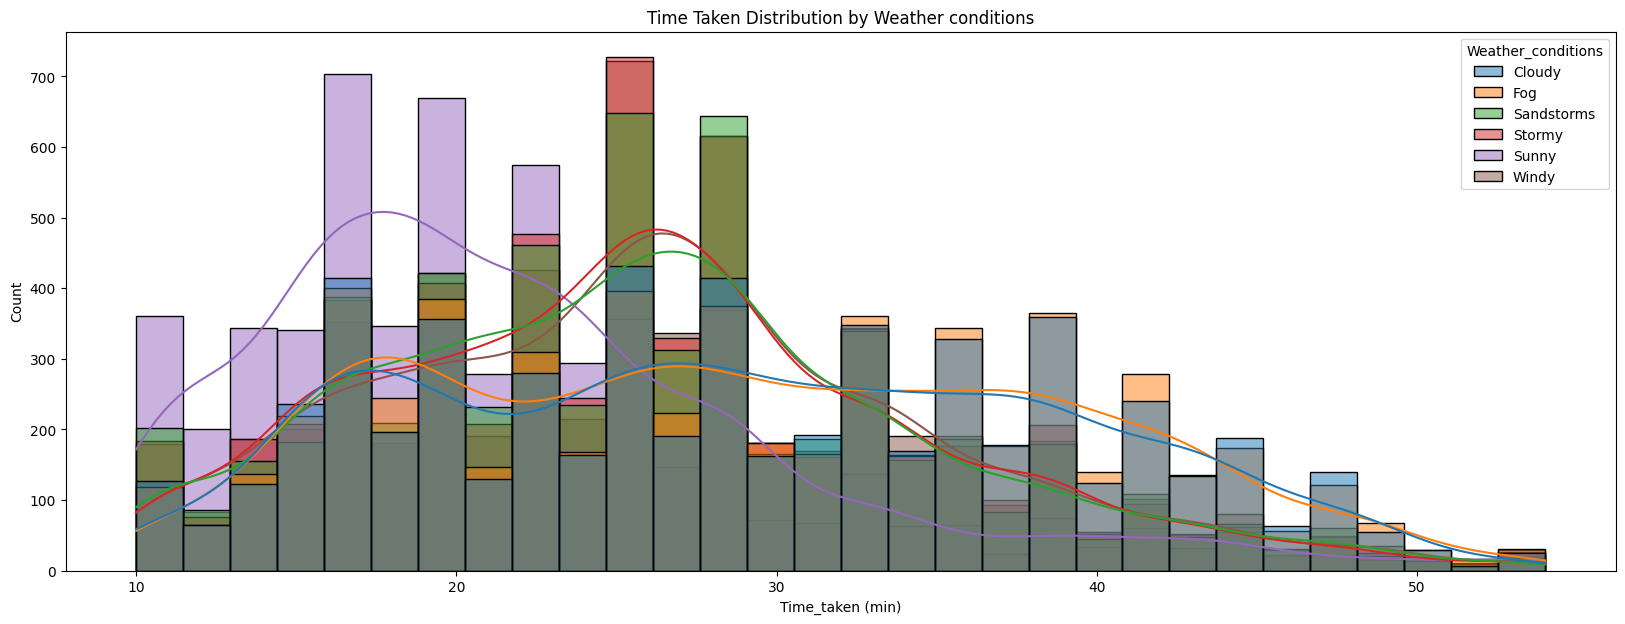

In [ ]:
# Histogram của time_taken theo Weather conditions
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='Time_taken (min)', hue='Weather_conditions', bins=30, kde=True)
plt.title('Time Taken Distribution by Weather conditions')
plt.show()

##### With the Area

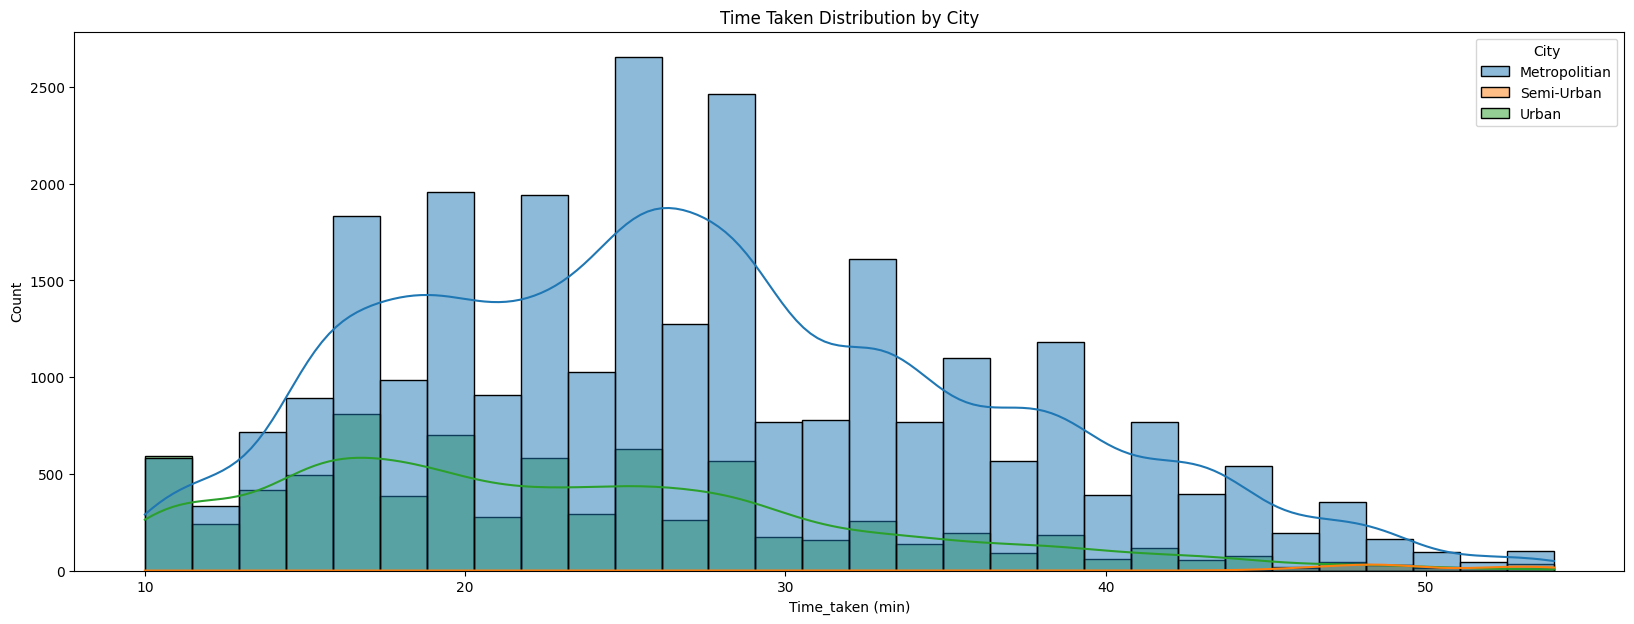

In [ ]:
# Histogram của time_taken theo City
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='Time_taken (min)', hue='City', bins=30, kde=True)
plt.title('Time Taken Distribution by City')
plt.show()

#### **Density Plot**

In [ ]:
median_time_taken = df['Time_taken (min)'].median()
df_median_time_taken = df[df['Time_taken (min)'] > median_time_taken]

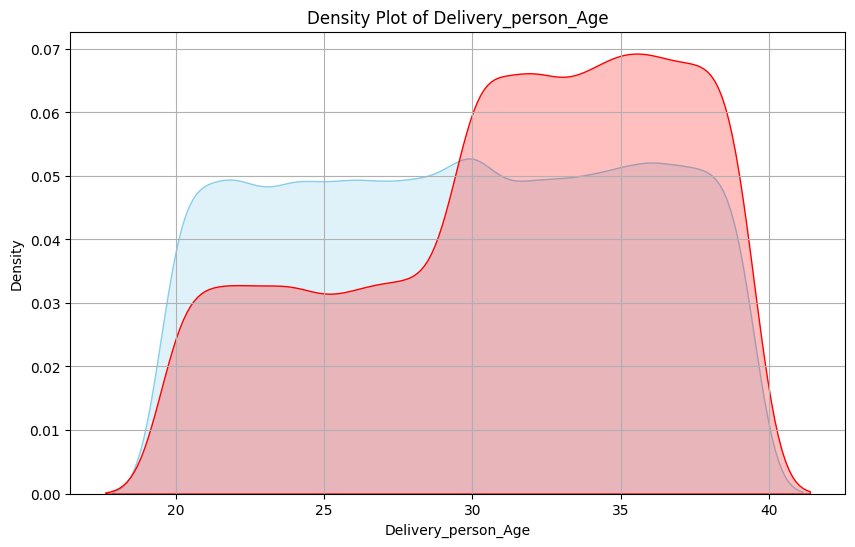

In [ ]:
list_col_Density = ['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd']

k = 0
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=list_col_Density[k], fill=True, color='skyblue')
sns.kdeplot(data=df_median_time_taken, x=list_col_Density[k], fill=True, color='red')
plt.title('Density Plot of ' + list_col_Density[k])
plt.xlabel(list_col_Density[k])
plt.grid(True)
plt.show()

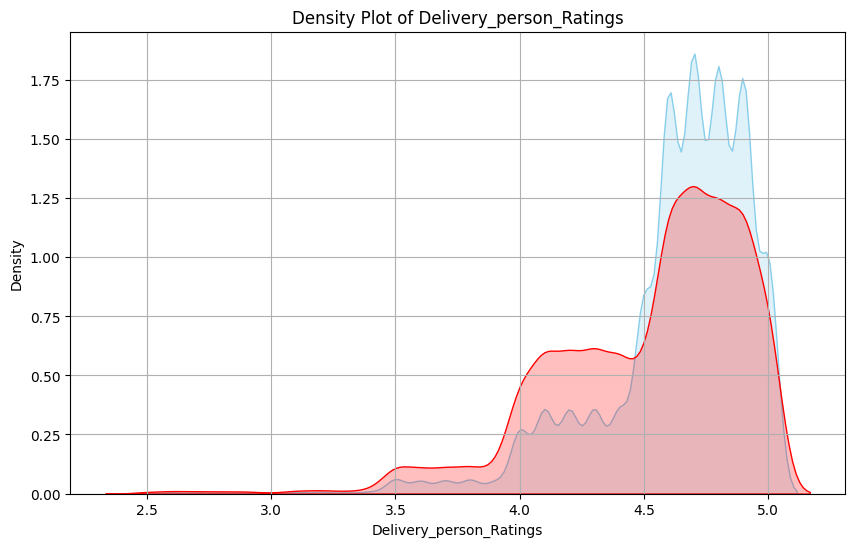

In [ ]:
list_col_Density = ['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd']

k = 1
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=list_col_Density[k], fill=True, color='skyblue')
sns.kdeplot(data=df_median_time_taken, x=list_col_Density[k], fill=True, color='red')
plt.title('Density Plot of ' + list_col_Density[k])
plt.xlabel(list_col_Density[k])
plt.grid(True)
plt.show()

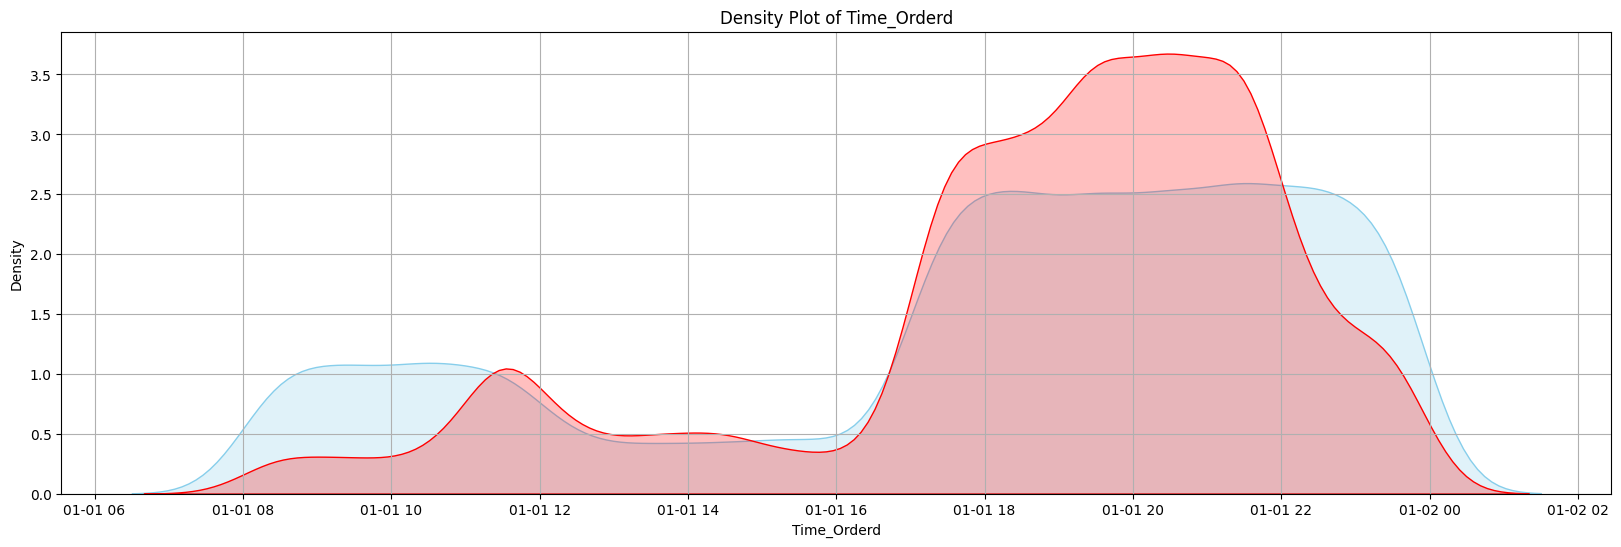

In [ ]:
list_col_Density = ['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd']

k = 2
plt.figure(figsize=(20, 6))
sns.kdeplot(data=df, x=list_col_Density[k], fill=True, color='skyblue')
sns.kdeplot(data=df_median_time_taken, x=list_col_Density[k], fill=True, color='red')
plt.title('Density Plot of ' + list_col_Density[k])
plt.xlabel(list_col_Density[k])
plt.grid(True)
plt.show()

#### **Box Plot**

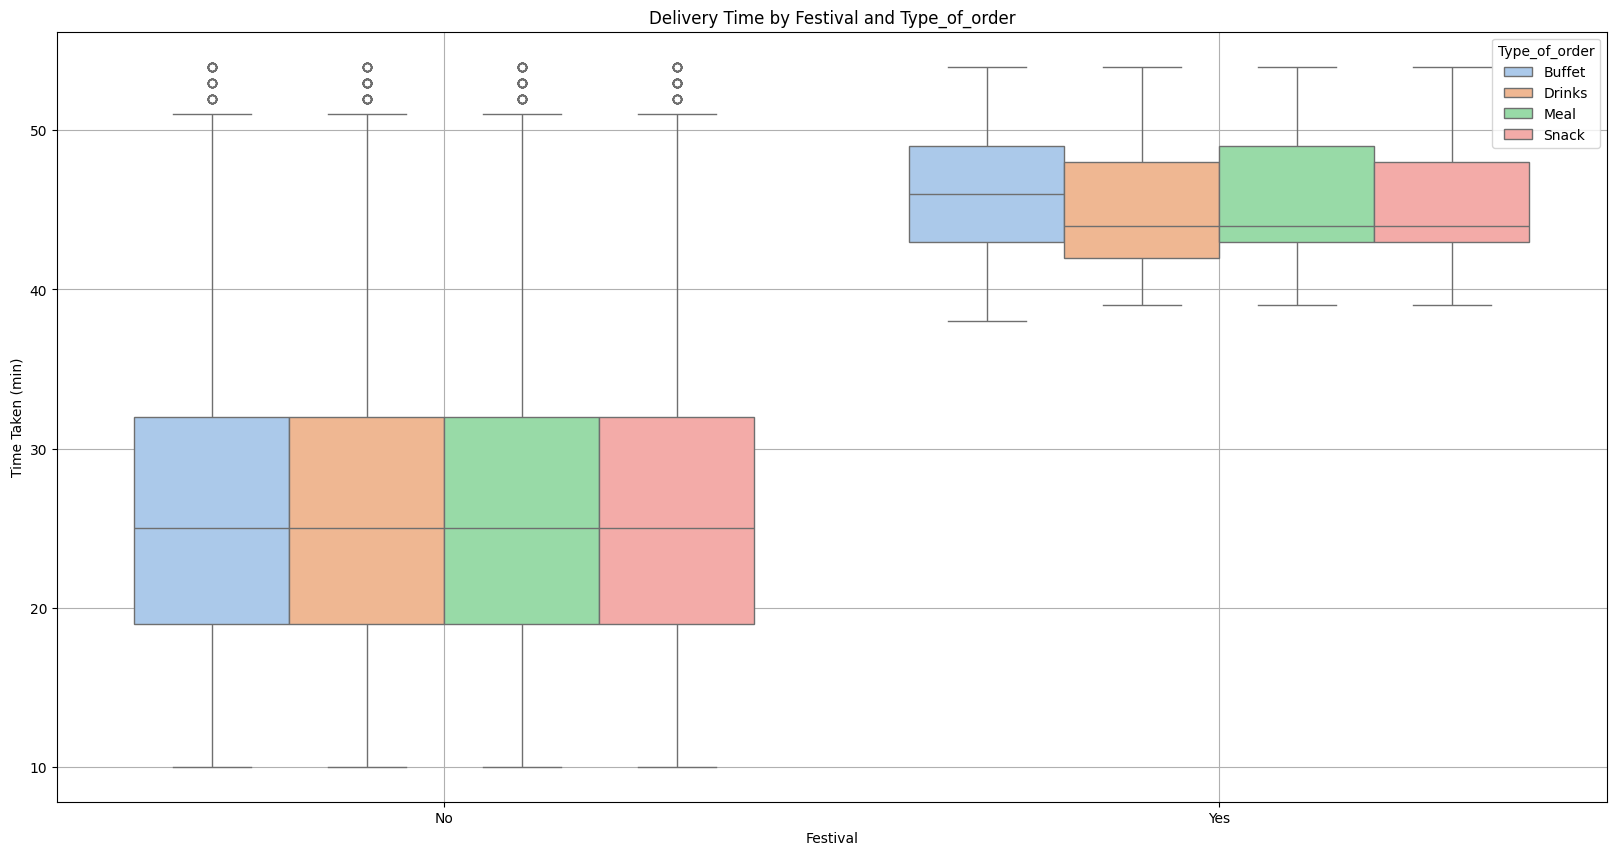

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Festival', y='Time_taken (min)', hue='Type_of_order', palette='pastel')
plt.title('Delivery Time by Festival and Type_of_order')
plt.xlabel('Festival')
plt.ylabel('Time Taken (min)')
plt.legend(title='Type_of_order')
plt.grid(True)
plt.show()

#### **Regression Analysist**

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Weather_conditions', 'Road_traffic_density', 'Festival', 'Type_of_order', 'City'], drop_first=True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35407 entries, 0 to 45583
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Delivery_person_ID             35407 non-null  string        
 1   Delivery_person_Age            35407 non-null  float64       
 2   Delivery_person_Ratings        35407 non-null  float64       
 3   Restaurant_latitude            35407 non-null  float64       
 4   Restaurant_longitude           35407 non-null  float64       
 5   Delivery_location_latitude     35407 non-null  float64       
 6   Delivery_location_longitude    35407 non-null  float64       
 7   Order_Date                     35407 non-null  datetime64[ns]
 8   Time_Orderd                    35407 non-null  datetime64[ns]
 9   Time_Order_picked              35407 non-null  datetime64[ns]
 10  Vehicle_condition              35407 non-null  category      
 11  Type_of_vehicle     

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Giả sử X là các biến đầu vào và y là thời gian giao hàng
X = df_encoded.drop(columns=['Time_taken (min)', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd','Time_Hour', 'Time_Hour_str','Time_Order_picked','Vehicle_condition','Type_of_vehicle'])
y = df_encoded['Time_taken (min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


R2 Score: 0.57
MSE: 38.44


*   R² Score = 0.57 → The model explains 57% of the variance in the delivery time (Time_taken (min)) based on the input variables. This is a relatively acceptable level given the noisy nature of real-world delivery data.

*   MSE = 88.44 → The Mean Squared Error (MSE) represents the average squared difference between the predicted and actual values, indicating the prediction error of the model.

In [ ]:
coef = pd.Series(model.coef_, index=X.columns)
print(coef.sort_values(ascending=False).head(10))  # top yếu tố làm tăng thời gian


Delivery_location_longitude    48.457109
City_Semi-Urban                11.314351
Festival_Yes                   10.596943
multiple_deliveries             3.185094
Delivery_person_Age             0.384519
Road_traffic_density_Jam        0.264877
Restaurant_latitude             0.021937
Weather_conditions_Fog          0.014460
Type_of_order_Snack            -0.030602
Delivery_location_latitude     -0.031430
dtype: float64


### **👉 Conclusions**
#### Delivery staff
1.   **Delivery_person_Age:** Employees aged 28 and under have a faster delivery time rate.
2.   **Delivery_person_Ratings:** Faster delivery times tend to receive higher ratings.

##### Vehicles
1.   **Vehicle_condition:** The condition of the vehicle affects the delivery time. A good vehicle condition ensures faster delivery. Regular maintenance plans for the vehicle are necessary.
2.   **multiple_deliveries:** Multiple deliveries affect the delivery time. It is necessary to calculate and adjust accordingly.

##### Order and Timing
1.   **Time_Orderd:** The time frame from 5 PM to 10 PM has a longer delivery rate than average. It is necessary to increase personnel during this period.
2.   **Festival:** Delivery times during the Festival are always higher. There is a need to plan for staffing for the Festival.

##### Weather and traffic conditions
1.   **Weather_conditions:** Weather conditions affect delivery time, sunny is the best.
2.   **Road_traffic_density:** Road Traffic affect delivery time. It is necessary to improve the routing application to avoid high traffic density routes.

##### Area
1.   **City:** Semi-Urban have Time - Taken is so high. Need to have a solution to fix.

### **👉 Top yếu tố làm tăng thời gian giao hàng (dựa theo hệ số hồi quy):**
| Biến                          | Hệ số ảnh hưởng | Giải thích                                                                       |
| ----------------------------- | --------------- | -------------------------------------------------------------------------------- |
| `Delivery_location_longitude` | **48.46**       | Khoảng cách địa lý xa hơn (toạ độ longitude lớn hơn) → tăng thời gian giao hàng. |
| `City_Semi-Urban`             | **11.31**       | Giao hàng tại vùng bán đô thị khiến thời gian giao hàng cao hơn đáng kể.         |
| `Festival_Yes`                | **10.60**       | Giao hàng trong dịp lễ tốn thời gian hơn do tắc nghẽn, thiếu nhân lực.           |
| `multiple_deliveries`         | **3.14**        | Mỗi lần thêm 1 đơn hàng trong cùng chuyến đi làm tăng thời gian.                 |
| `Delivery_person_Age`         | **0.38**        | Tuổi lớn hơn liên quan đến tốc độ giao hàng chậm hơn một chút.                   |
| `Road_traffic_density_Jam`    | **0.26**        | Khi giao hàng trong điều kiện "Jam" (kẹt xe), thời gian tăng lên đáng kể.        |
